# Desafio Técnico - Estágio Engenharia de Dados - Grão Direto


## **ETAPA 1: TRATAMENTO DE DADOS**

1. **Leitura dos Dados:**

   - Leia o arquivo CSV fornecido e carregue os dados em estruturas de dados adequadas.

2. **Pré-processamento:**
   - Realize qualquer pré-processamento necessário nos dados, como:
     - Tratamento de valores ausentes
     - Limpeza dos dados
     - Normalização dos dados


### **1. Leitura**


In [39]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
# Leitura do arquivo csv
csv_path = "./data/commerce_dataset.csv"

df = pd.read_csv(csv_path, sep=";")  # o csv está separado por ';'

In [41]:
# Checando as primeiras linhas do dataframe
df.head(5)

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,vat,total,dtme,tme,payment_method,cogs,gross_margin_pct,gross_income,rating,time_of_day,day_name,month_name
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05 00:00:00,13:08:00,Ewallet,522.83,4.7619,26.1415,9.1,afternoon,Saturday,January
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08 00:00:00,10:29:00,Cash,76.40,4.7619,3.8200,9.6,morning,Friday,March
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03 00:00:00,13:23:00,Credit card,324.31,4.7619,16.2155,7.4,afternoon,Sunday,March
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27 00:00:00,20:33:00,Ewallet,465.76,4.7619,23.2880,8.4,evening,Sunday,January
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08 00:00:00,10:37:00,Ewallet,604.17,4.7619,30.2085,5.3,morning,Friday,February


### **2. Pré-processamento**


In [42]:
# Verificando o tipo de cada coluna - Não sei se é necessário e nem se deixo :/
df.dtypes

invoice_id           object
branch               object
city                 object
customer_type        object
gender               object
product_line         object
unit_price          float64
quantity              int64
vat                 float64
total               float64
dtme                 object
tme                  object
payment_method       object
cogs                float64
gross_margin_pct    float64
gross_income        float64
rating              float64
time_of_day          object
day_name             object
month_name           object
dtype: object

In [43]:
# Verificando se há valores nulos
missing_values = df.isnull().sum()
missing_values

invoice_id          0
branch              0
city                0
customer_type       0
gender              0
product_line        0
unit_price          0
quantity            0
vat                 0
total               0
dtme                0
tme                 0
payment_method      0
cogs                0
gross_margin_pct    0
gross_income        0
rating              0
time_of_day         0
day_name            0
month_name          0
dtype: int64

In [44]:
# Verificando se existem linhas duplicadas
duplicates = df.duplicated().sum()
duplicates

0

In [45]:
# Fazer um sumario para identificar possiveis outliers ou anomalias
summary_stats = df.describe()
summary_stats

,unit_price,quantity,vat,total,cogs,gross_margin_pct,gross_income,rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.0000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.7619,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.0000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.7619,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.7619,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.7619,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.7619,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.7619,49.650000,10.00000


In [46]:
# `dtme: Data da transação`
# Converter "dtme" para datetime, basicamente remover a hora e deixar apenas a data
df["dtme"] = pd.to_datetime(df["dtme"])

# Extrair "month" e "quarter" para analise
df["month"] = df["dtme"].dt.month
df["quarter"] = df["dtme"].dt.quarter

df.head(5)

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,vat,total,...,payment_method,cogs,gross_margin_pct,gross_income,rating,time_of_day,day_name,month_name,month,quarter
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.7619,26.1415,9.1,afternoon,Saturday,January,1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.7619,3.8200,9.6,morning,Friday,March,3,1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.7619,16.2155,7.4,afternoon,Sunday,March,3,1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.7619,23.2880,8.4,evening,Sunday,January,1,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.7619,30.2085,5.3,morning,Friday,February,2,1


In [47]:
# exportar para um csv
# df.to_csv("./data/commerce_dataset_clean.csv", sep=";", index=False)
df.dtypes

invoice_id                  object
branch                      object
city                        object
customer_type               object
gender                      object
product_line                object
unit_price                 float64
quantity                     int64
vat                        float64
total                      float64
dtme                datetime64[ns]
tme                         object
payment_method              object
cogs                       float64
gross_margin_pct           float64
gross_income               float64
rating                     float64
time_of_day                 object
day_name                    object
month_name                  object
month                        int32
quarter                      int32
dtype: object

## **ETAPA 2: ENGENHARIA DE DADOS**

3. **Cálculo e Apresentação de Métricas de Desempenho de Vendas:**

   - Calcule e apresente as seguintes métricas de desempenho de vendas:
     - Total de vendas no período.
     - Número total de produtos vendidos.
     - Média de preço unitário de linha de produtos.
     - Linha de produto mais vendido (em termos de quantidade).
     - As 5 linhas de produtos mais bem avaliados (média de rating mais alta).
     - Loja com o maior volume de vendas.
     - Método de pagamento mais popular por loja e mês.
     - As 3 linhas de produtos com mais quantidades vendidas por gênero do cliente.
     - Produto mais lucrativo (maior receita gross_income) por filial (branch).
     - Produto mais lucrativo (maior receita gross_income) por quarter.
     - Período do dia em que ocorre o maior número de vendas.
     - Realize uma análise mais detalhada explorando as vendas por quarter (trimestre), por região e por categoria de produtos.

### **3. Cálculo e Apresentação de Métricas de Desempenho de Vendas**

In [48]:
# Total de vendas no período
total_sales = df["total"].sum()
total_sales

322966.749

In [49]:
# Número total de produtos vendidos
total_products_sold = df["quantity"].sum()
total_products_sold

5510

In [50]:
# Média de preço unitário de linha de produtos.
average_unit_price_by_product_line = df.groupby("product_line")["unit_price"].mean()
average_unit_price_by_product_line

product_line
Electronic accessories    53.551588
Fashion accessories       57.153652
Food and beverages        56.008851
Health and beauty         54.854474
Home and lifestyle        55.316937
Sports and travel         56.993253
Name: unit_price, dtype: float64

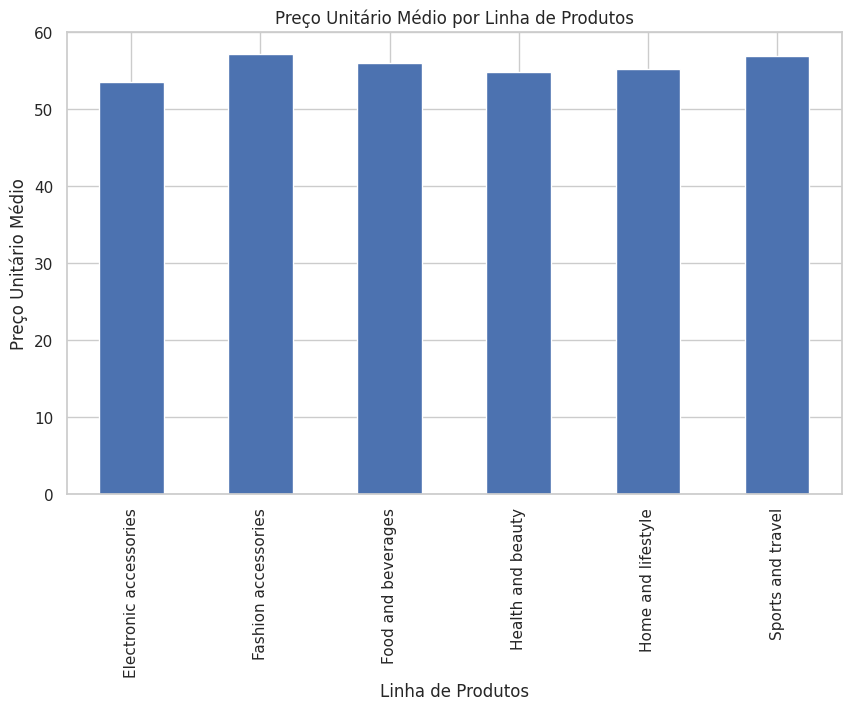

In [68]:
# Média de preço unitário de linha de produtos.
average_unit_price_by_product_line = df.groupby("product_line")["unit_price"].mean()

# Criar um gráfico de barras
average_unit_price_by_product_line.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Linha de Produtos')  # Adicionar rótulo para o eixo x
plt.ylabel('Preço Unitário Médio')  # Adicionar rótulo para o eixo y
plt.title('Preço Unitário Médio por Linha de Produtos')  # Adicionar título

plt.show() 

In [51]:
# Linha de produto mais vendido (em termos de quantidade)
most_sold_product_line = df.groupby("product_line")["quantity"].sum().idxmax()
most_sold_product_line

'Electronic accessories'

In [52]:
# As 5 linhas de produtos mais bem avaliadas (média de rating mais alta)
top_rated_product_lines = df.groupby("product_line")["rating"].mean().nlargest(5)
top_rated_product_lines


product_line
Food and beverages        7.113218
Fashion accessories       7.029213
Health and beauty         7.003289
Electronic accessories    6.924706
Sports and travel         6.916265
Name: rating, dtype: float64

In [53]:
# Loja com o maior volume de vendas
store_highest_sales = df.groupby("branch")["total"].sum().idxmax()
store_highest_sales

'C'

In [54]:
# Método de pagamento mais popular por loja e mês
popular_payment_method = df.groupby(["branch", "month", "payment_method"]).size().unstack().idxmax(axis=1)
popular_payment_method


branch  month
A       1            Ewallet
        2            Ewallet
        3            Ewallet
B       1        Credit card
        2               Cash
        3            Ewallet
C       1               Cash
        2               Cash
        3               Cash
dtype: object

In [55]:
# As 3 linhas de produtos com mais quantidades vendidas por gênero do cliente
top_3_product_lines_by_gender = df.groupby(['gender', 'product_line'])['quantity'].sum().groupby(level=0, group_keys=False).nlargest(3)
top_3_product_lines_by_gender


gender  product_line          
Female  Fashion accessories       530
        Food and beverages        514
        Home and lifestyle        498
Male    Health and beauty         511
        Electronic accessories    483
        Food and beverages        438
Name: quantity, dtype: int64

In [56]:
# Produto mais lucrativo (maior receita gross_income) por filial (branch)
most_profitable_product_by_branch = df.groupby(['branch', 'product_line'])['gross_income'].sum().groupby(level=0, group_keys=False).idxmax()
most_profitable_product_by_branch

branch
A    (A, Home and lifestyle)
B     (B, Sports and travel)
C    (C, Food and beverages)
Name: gross_income, dtype: object

In [57]:
# Produto mais lucrativo (maior receita gross_income) por quarter
most_profitable_product_by_quarter = df.groupby(['quarter', 'product_line'])['gross_income'].sum().groupby(level=0, group_keys=False).idxmax()
most_profitable_product_by_quarter

quarter
1    (1, Food and beverages)
Name: gross_income, dtype: object

In [58]:
# Período do dia em que ocorre o maior número de vendas
most_sales_time_of_day = df.groupby('time_of_day')['total'].sum().idxmax()
most_sales_time_of_day

'evening'

In [59]:
# Realizando cálculos intermediários para a análise detalhada
sales_analysis_by_quarter_region_category = df.groupby(['quarter', 'city', 'product_line']).agg({'total': 'sum', 'quantity': 'sum', 'gross_income': 'sum'})
sales_analysis_by_quarter_region_category

total  quantity  gross_income
quarter city      product_line                                              
1       Mandalay  Electronic accessories  17051.4435       316      811.9735
                  Fashion accessories     16413.3165       297      781.5865
                  Food and beverages      15214.8885       270      724.5185
                  Health and beauty       19980.6600       320      951.4600
                  Home and lifestyle      17549.1645       295      835.6745
                  Sports and travel       19988.1990       322      951.8190
        Naypyitaw Electronic accessories  18968.9745       333      903.2845
                  Fashion accessories     21560.0700       342     1026.6700
                  Food and beverages      23766.8550       369     1131.7550
                  Health and beauty       16615.3260       277      791.2060
                  Home and lifestyle      13895.5530       245      661.6930
                  Sports and travel       15761.9280       265      750.5680
        Yangon    Electronic accessories  18317.1135       322      872.2435
                  Fashion accessories     16332.5085       263      777.7385
                  Food and beverages      17163.1005       313      817.2905
                  Health and beauty       12597.7530       257      599.8930
                  Home and lifestyle      22417.1955       371     1067.4855
                  Sports and travel       19372.6995       333      922.5095

In [73]:
# Apresentando resultados iniciais
# (total_sales, total_products_sold, most_sold_product_line, store_highest_sales, most_sales_time_of_day, average_unit_price_by_product_line, top_rated_product_lines, popular_payment_method, top_3_product_lines_by_gender, most_profitable_product_by_branch, most_profitable_product_by_quarter, sales_analysis_by_quarter_region_category.head())
# df # aqui ainda tem month e quarter

## **ETAPA 3: ANÁLISE EXPLORATÓRIA DE DADOS**

In [61]:
# Configuring the aesthetics for seaborn plots
sns.set_theme(style="whitegrid")

In [62]:
# Prepare data for plotting
df_grouped_product_line = df.groupby('product_line')['quantity'].sum().reset_index()
df_top_rated_product_lines = top_rated_product_lines.reset_index()
df_sales_by_branch = df.groupby('branch')['total'].sum().reset_index()
df_payment_method = df.groupby(['branch', 'payment_method']).size().reset_index(name='counts')
df

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,vat,total,...,payment_method,cogs,gross_margin_pct,gross_income,rating,time_of_day,day_name,month_name,month,quarter
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.7619,26.1415,9.1,afternoon,Saturday,January,1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.7619,3.8200,9.6,morning,Friday,March,3,1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.7619,16.2155,7.4,afternoon,Sunday,March,3,1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.7619,23.2880,8.4,evening,Sunday,January,1,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.7619,30.2085,5.3,morning,Friday,February,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,...,Ewallet,40.35,4.7619,2.0175,6.2,afternoon,Tuesday,January,1,1
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,...,Ewallet,973.80,4.7619,48.6900,4.4,evening,Saturday,March,3,1
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,...,Cash,31.84,4.7619,1.5920,7.7,afternoon,Saturday,February,2,1
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,...,Cash,65.82,4.7619,3.2910,4.1,afternoon,Friday,February,2,1


### plot

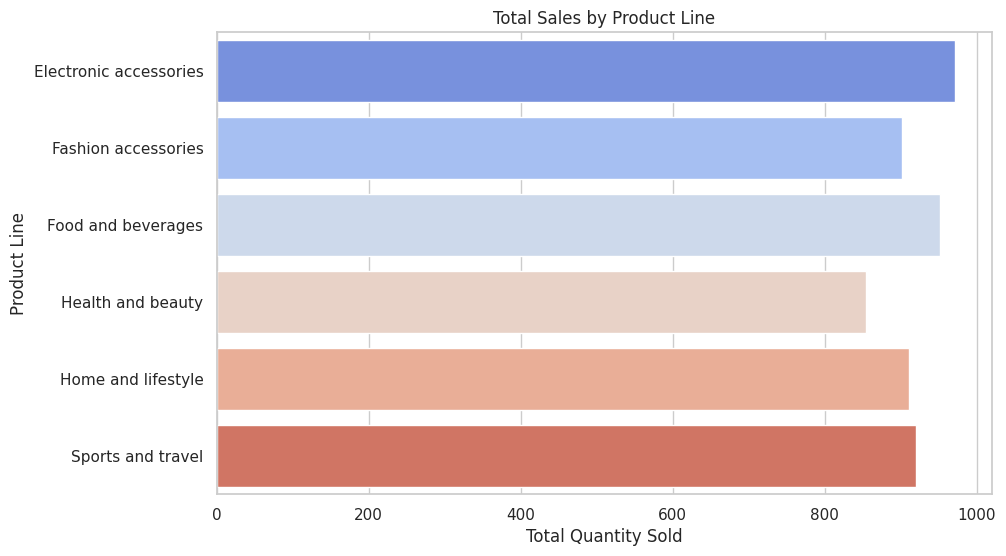

In [63]:
# Total Sales by Product Line
plt.figure(figsize=(10, 6))
sns.barplot(data=df_grouped_product_line, x='quantity', y='product_line', palette='coolwarm', hue='product_line')
plt.title('Total Sales by Product Line')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Line')
plt.show()

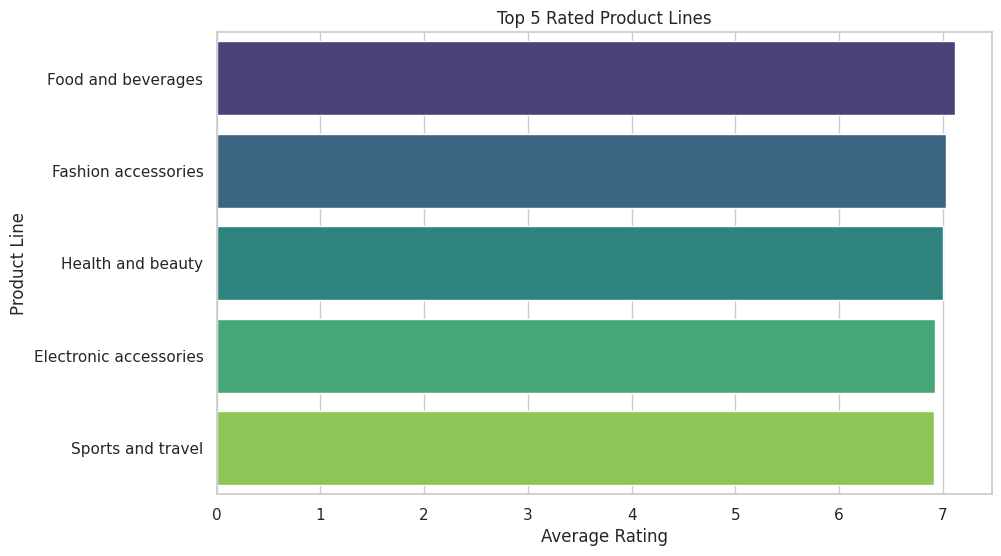

In [64]:
# Top 5 Rated Product Lines
plt.figure(figsize=(10, 6))
sns.barplot(data=df_top_rated_product_lines, x='rating', y='product_line', palette='viridis', hue='product_line')
plt.title('Top 5 Rated Product Lines')
plt.xlabel('Average Rating')
plt.ylabel('Product Line')
plt.show()

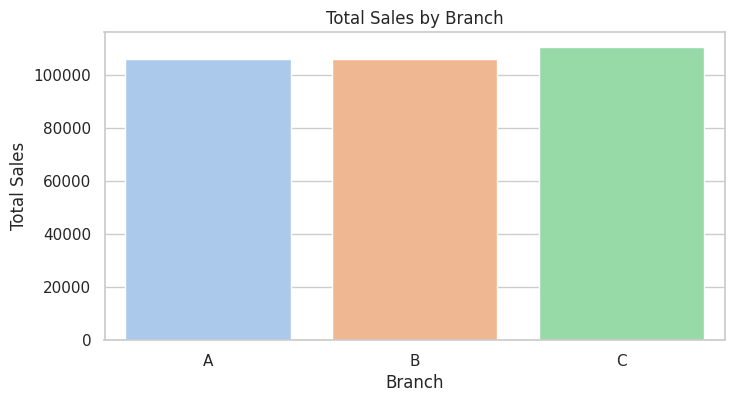

In [65]:
# Total Sales by Branch
plt.figure(figsize=(8, 4))
sns.barplot(data=df_sales_by_branch, x='branch', y='total', palette='pastel', hue='branch')
plt.title('Total Sales by Branch')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.show()

In [66]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# # import numpy as np

# # Assuming 'dtme' is the datetime and 'total' is the total sales
# # df['date'] = pd.to_datetime(df['dtme']).dt.date  # Extracting date for aggregation
# df["dtme"] = pd.to_datetime(df["dtme"])
# daily_sales = df.groupby('date')['total'].sum().reset_index()

# # For time series forecasting, let's convert dates into numerical values (e.g., days since start)
# daily_sales['date'] = pd.to_datetime(daily_sales['date'])
# daily_sales['days_since_start'] = (daily_sales['date'] - daily_sales['date'].min()).dt.days


# # Splitting the data into train and test sets
# X = daily_sales[['days_since_start']]
# y = daily_sales['total']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Training a simple Linear Regression model
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Making predictions
# predictions = model.predict(X_test)

# # Evaluating the model
# mse = mean_squared_error(y_test, predictions)
# rmse = np.sqrt(mse)

# # Output the model performance
# print(f"RMSE: {rmse}")

# # Plotting the actual vs predicted sales
# plt.figure(figsize=(10, 6))
# plt.scatter(X_test, y_test, color='black', label='Actual Sales')
# plt.plot(X_test, predictions, color='blue', linewidth=2, label='Predicted Sales')
# plt.title('Actual vs Predicted Sales')
# plt.xlabel('Days Since Start')
# plt.ylabel('Total Sales')
# plt.legend()
# plt.show()

10:05:29 - cmdstanpy - INFO - Chain [1] start processing
10:05:29 - cmdstanpy - INFO - Chain [1] done processing
/home/kiwi/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/kiwi/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
/home/kiwi/.local/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future ver

/home/kiwi/.local/lib/python3.10/site-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/home/kiwi/.local/lib/python3.10/site-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name + '_lower'],


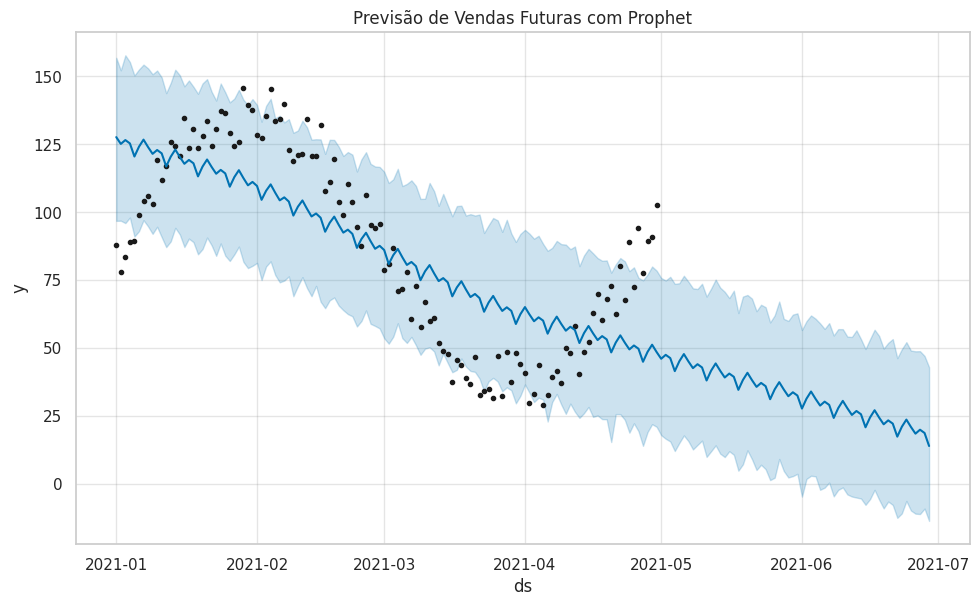

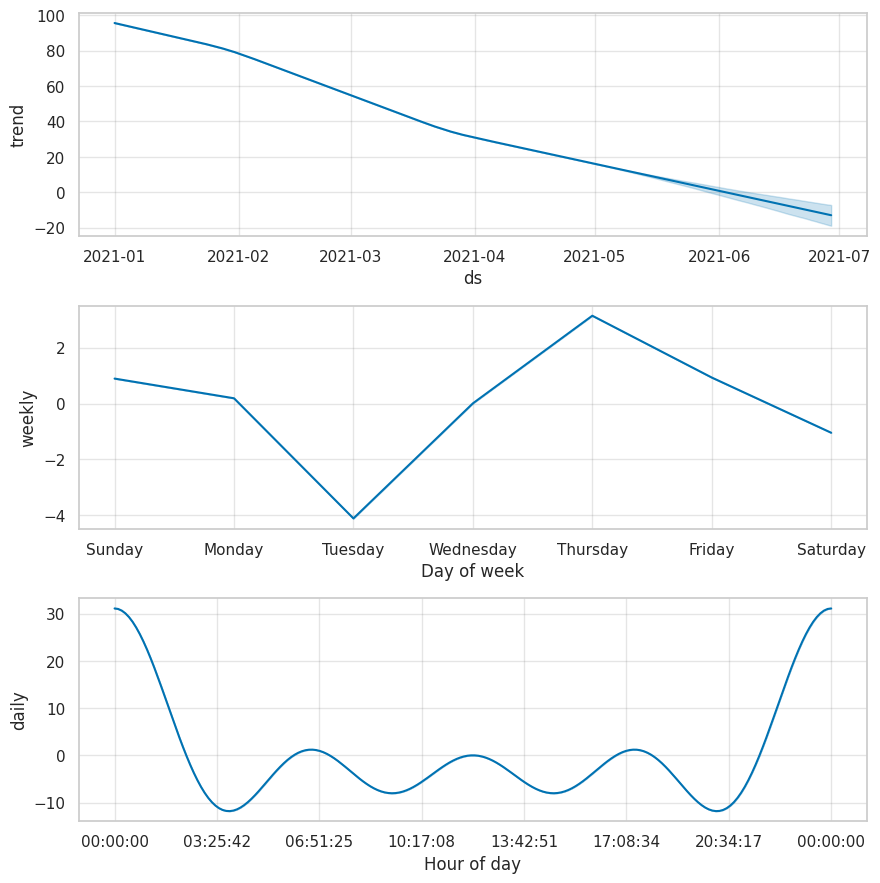

In [67]:
from prophet import Prophet
import pandas as pd

# Supondo que o dataframe 'daily_sales' contém duas colunas: 'date' (as datas das vendas) e 'total_sales' (o total de vendas para cada dia)
# Para este exemplo, vamos criar um dataframe de exemplo 'daily_sales'
daily_sales = pd.DataFrame({
    'date': pd.date_range(start='2021-01-01', periods=120, freq='D'),
    'total_sales': (np.sin(np.arange(120) / 18.5) + np.random.rand(120) / 2 + 1.5) * 50
})

# Preparando os dados para o Prophet
df_prophet = daily_sales.rename(columns={'date': 'ds', 'total_sales': 'y'})

# Inicializando o modelo Prophet
model = Prophet(daily_seasonality=True)

# Treinando o modelo
model.fit(df_prophet)

# Criando um dataframe para as previsões futuras
future = model.make_future_dataframe(periods=60)  # Previsão para os próximos 60 dias

# Fazendo as previsões
forecast = model.predict(future)

# Visualizando as previsões
fig1 = model.plot(forecast)
plt.title('Previsão de Vendas Futuras com Prophet')

# Visualizando componentes das previsões (tendência, sazonalidade anual, semanal, etc.)
fig2 = model.plot_components(forecast)